# Project : Communicate-Data-Findings (Ford GoBike System Data)

## Table of Contents

- [Introduction](#intro)

- [Part I -  Preliminary Wrangling](#Preliminary Wrangling)

- [Part I -  Univariae Exploration](#Univariae Exploration)

- [Part III - Bivariate Exploration](#Bivariate Exploration)

- [Part IIII - Multivariate Exploration](#Multivariate Exploration)

- [Part IIIII - Conclusions](#Conclusions)





### Introduction

Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

# Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import seaborn as sb
import pickle
import os
import glob
%matplotlib inline
random.seed()

In [2]:
# load in the dataset into a pandas dataframe and clean up field dtypes
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923   4902.0    Customer             1984.0   
1            -122.393170   2535.0    Customer                NaN   
2            -122.404904   5905.0    Customer             1972.0   
3            -122.444293   6638.0  Subscriber             1989.0   
4            -122.248780   4898.0  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [4]:
# Let's take a peak into the data's basic information
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29225 entries, 0 to 29224
Data columns (total 16 columns):
duration_sec               29225 non-null int64
start_time                 29225 non-null object
end_time                   29225 non-null object
start_station_id           29191 non-null float64
start_station_name         29191 non-null object
start_station_latitude     29225 non-null float64
start_station_longitude    29225 non-null float64
end_station_id             29190 non-null float64
end_station_name           29190 non-null object
end_station_latitude       29224 non-null float64
end_station_longitude      29224 non-null float64
bike_id                    29224 non-null float64
user_type                  29224 non-null object
member_birth_year          28171 non-null float64
member_gender              28171 non-null object
bike_share_for_all_trip    29224 non-null object
dtypes: float64(8), int64(1), object(7)
memory usage: 3.6+ MB


In [5]:
#show the number of unique user

df.shape[0]

29225

In [6]:
#show the number of unique user

df.nunique()

duration_sec                2262
start_time                 29224
end_time                   29224
start_station_id             326
start_station_name           326
start_station_latitude       329
start_station_longitude      331
end_station_id               324
end_station_name             324
end_station_latitude         328
end_station_longitude        329
bike_id                     3400
user_type                      2
member_birth_year             65
member_gender                  3
bike_share_for_all_trip        2
dtype: int64

In [7]:
# Let's also get some additional description for stats figures
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  29225.000000      29191.000000            29225.000000   
mean     675.335261        134.742215               37.768929   
std     1633.914613        111.417506                0.102024   
min       61.000000          3.000000               37.317298   
25%      320.000000         44.000000               37.770407   
50%      502.000000         95.000000               37.780526   
75%      762.000000        232.000000               37.795392   
max    83195.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count             29225.000000    29190.000000          29224.000000   
mean               -122.352717      132.422816             37.769280   
std                   0.119240      111.231060              0.101947   
min                -122.453704        3.000000             37.317298   
25%                -122.411738       41.000000             37.771058   
50%                -122.397437       93.000000             37.780760   
75%                -122.293400      223.000000             37.795392   
max                -121.874119      398.000000             37.880222   

       end_station_longitude       bike_id  member_birth_year  
count           29224.000000  29224.000000       28171.000000  
mean             -122.352093   4929.272139        1984.774271  
std                 0.118776   1547.813928           9.991789  
min              -122.453704     11.000000        1878.000000  
25%              -122.410807   4589.000000        1980.000000  
50%              -122.397086   5315.000000        1987.000000  
75%              -122.293528   6051.000000        1992.000000  
max              -121.874119   6644.000000        2001.000000

In [8]:
df.dropna() 

duration_sec                start_time                  end_time  \
0             52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
2             61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3             36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4              1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5              1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   
6              1147  2019-02-28 23:55:35.1040  2019-03-01 00:14:42.5880   
7              1615  2019-02-28 23:41:06.7660  2019-03-01 00:08:02.7560   
8              1570  2019-02-28 23:41:48.7900  2019-03-01 00:07:59.7150   
9              1049  2019-02-28 23:49:47.6990  2019-03-01 00:07:17.0250   
10              458  2019-02-28 23:57:57.2110  2019-03-01 00:05:35.4350   
11              506  2019-02-28 23:56:55.5400  2019-03-01 00:05:21.7330   
12             1176  2019-02-28 23:45:12.6510  2019-03-01 00:04:49.1840   
14              395  2019-02-28 23:56:26.8480  2019-03-01 00:03:01.9470   
15              208  2019-02-28 23:59:18.5480  2019-03-01 00:02:47.2280   
16              548  2019-02-28 23:50:41.6070  2019-02-28 23:59:49.9530   
17              674  2019-02-28 23:48:25.0950  2019-02-28 23:59:40.0920   
18              557  2019-02-28 23:49:01.8510  2019-02-28 23:58:19.8090   
19              874  2019-02-28 23:43:05.1830  2019-02-28 23:57:39.7960   
20              417  2019-02-28 23:50:38.2390  2019-02-28 23:57:35.8520   
21              414  2019-02-28 23:50:26.8790  2019-02-28 23:57:21.1300   
22              743  2019-02-28 23:44:56.4390  2019-02-28 23:57:20.2120   
23              367  2019-02-28 23:51:06.0140  2019-02-28 23:57:13.3120   
24              252  2019-02-28 23:52:51.1640  2019-02-28 23:57:03.9760   
25              360  2019-02-28 23:50:31.4310  2019-02-28 23:56:31.8910   
26              385  2019-02-28 23:49:24.3990  2019-02-28 23:55:50.2840   
27              408  2019-02-28 23:48:08.2820  2019-02-28 23:54:56.9300   
29              629  2019-02-28 23:43:48.6580  2019-02-28 23:54:18.2540   
30              163  2019-02-28 23:50:45.6980  2019-02-28 23:53:29.5690   
31              223  2019-02-28 23:49:27.0270  2019-02-28 23:53:10.5350   
32              405  2019-02-28 23:45:39.2340  2019-02-28 23:52:24.8500   
...             ...                       ...                       ...   
29194          1291  2019-02-25 07:32:24.0100  2019-02-25 07:53:55.6680   
29195           449  2019-02-25 07:46:22.7500  2019-02-25 07:53:51.8170   
29196           723  2019-02-25 07:41:37.9720  2019-02-25 07:53:41.2940   
29197           434  2019-02-25 07:46:15.9290  2019-02-25 07:53:30.5640   
29198           344  2019-02-25 07:47:39.8300  2019-02-25 07:53:24.4340   
29199          1541  2019-02-25 07:27:41.1330  2019-02-25 07:53:22.9100   
29200           586  2019-02-25 07:43:27.1660  2019-02-25 07:53:13.4380   
29201           737  2019-02-25 07:40:51.0550  2019-02-25 07:53:08.8780   
29202           887  2019-02-25 07:38:17.5000  2019-02-25 07:53:05.2420   
29203           368  2019-02-25 07:46:56.4000  2019-02-25 07:53:05.2380   
29204           253  2019-02-25 07:48:50.7810  2019-02-25 07:53:04.3710   
29205           187  2019-02-25 07:49:54.7080  2019-02-25 07:53:02.6380   
29206            74  2019-02-25 07:51:47.2760  2019-02-25 07:53:01.4030   
29207           815  2019-02-25 07:39:24.5480  2019-02-25 07:53:00.4250   
29208           574  2019-02-25 07:43:24.3030  2019-02-25 07:52:58.4040   
29209           102  2019-02-25 07:51:13.4910  2019-02-25 07:52:56.0980   
29210           310  2019-02-25 07:47:25.5130  2019-02-25 07:52:35.6790   
29211           386  2019-02-25 07:46:09.5350  2019-02-25 07:52:35.6070   
29212           228  2019-02-25 07:48:45.1930  2019-02-25 07:52:34.1190   
29213           837  2019-02-25 07:38:36.2250  2019-02-25 07:52:33.3610   
29214          1480  2019-02-25 07:27:51.6700  2019-02-25 07:52:32.3190   
29215           300  2019-02-25 

In [9]:
# Let's take a peak into the data's basic information
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29225 entries, 0 to 29224
Data columns (total 16 columns):
duration_sec               29225 non-null int64
start_time                 29225 non-null object
end_time                   29225 non-null object
start_station_id           29191 non-null float64
start_station_name         29191 non-null object
start_station_latitude     29225 non-null float64
start_station_longitude    29225 non-null float64
end_station_id             29190 non-null float64
end_station_name           29190 non-null object
end_station_latitude       29224 non-null float64
end_station_longitude      29224 non-null float64
bike_id                    29224 non-null float64
user_type                  29224 non-null object
member_birth_year          28171 non-null float64
member_gender              28171 non-null object
bike_share_for_all_trip    29224 non-null object
dtypes: float64(8), int64(1), object(7)
memory usage: 3.6+ MB


In [10]:
#show the number of unique user

df.shape[0]

29225

In [11]:
#show the number of unique user

df.nunique()

duration_sec                2262
start_time                 29224
end_time                   29224
start_station_id             326
start_station_name           326
start_station_latitude       329
start_station_longitude      331
end_station_id               324
end_station_name             324
end_station_latitude         328
end_station_longitude        329
bike_id                     3400
user_type                      2
member_birth_year             65
member_gender                  3
bike_share_for_all_trip        2
dtype: int64

In [12]:
# Let's also get some additional description for stats figures
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  29225.000000      29191.000000            29225.000000   
mean     675.335261        134.742215               37.768929   
std     1633.914613        111.417506                0.102024   
min       61.000000          3.000000               37.317298   
25%      320.000000         44.000000               37.770407   
50%      502.000000         95.000000               37.780526   
75%      762.000000        232.000000               37.795392   
max    83195.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count             29225.000000    29190.000000          29224.000000   
mean               -122.352717      132.422816             37.769280   
std                   0.119240      111.231060              0.101947   
min                -122.453704        3.000000             37.317298   
25%                -122.411738       41.000000             37.771058   
50%                -122.397437       93.000000             37.780760   
75%                -122.293400      223.000000             37.795392   
max                -121.874119      398.000000             37.880222   

       end_station_longitude       bike_id  member_birth_year  
count           29224.000000  29224.000000       28171.000000  
mean             -122.352093   4929.272139        1984.774271  
std                 0.118776   1547.813928           9.991789  
min              -122.453704     11.000000        1878.000000  
25%              -122.410807   4589.000000        1980.000000  
50%              -122.397086   5315.000000        1987.000000  
75%              -122.293528   6051.000000        1992.000000  
max              -121.874119   6644.000000        2001.000000

In [13]:
# Any duplicates?
df.duplicated().sum()

0

In [14]:
# What about NaN values?
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id             34
start_station_name           34
start_station_latitude        0
start_station_longitude       0
end_station_id               35
end_station_name             35
end_station_latitude          1
end_station_longitude         1
bike_id                       1
user_type                     1
member_birth_year          1054
member_gender              1054
bike_share_for_all_trip       1
dtype: int64

In [15]:
df.isnull().mean()

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.001163
start_station_name         0.001163
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.001198
end_station_name           0.001198
end_station_latitude       0.000034
end_station_longitude      0.000034
bike_id                    0.000034
user_type                  0.000034
member_birth_year          0.036065
member_gender              0.036065
bike_share_for_all_trip    0.000034
dtype: float64

What is the structure of your dataset?

it contains 16 columns and 29225 rows.

What is/are the main feature(s) of interest in your dataset?

member birthyear, member gender, start and end station id and start and end stations name from the dataset.

What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Start and end stations name and member birtyear because it show the relationship berween the age and the distastance of the start and end stations

## Univariae Exploration

In [16]:
df.member_birth_year.mean()

1984.7742714138653

In [17]:
df.isnull().mean().member_birth_year

0.036065012831479899

In [18]:
df.member_birth_year.sum()

55913076.0

In [19]:
df.dropna().member_birth_year.describe()

count    28137.00000
mean      1984.76984
std          9.99456
min       1878.00000
25%       1980.00000
50%       1987.00000
75%       1992.00000
max       2001.00000
Name: member_birth_year, dtype: float64

In [20]:
df.dropna().duration_sec.describe()/60

count     468.950000
mean       11.134962
std        26.398406
min         1.016667
25%         5.316667
50%         8.333333
75%        12.650000
max      1386.583333
Name: duration_sec, dtype: float64

In [21]:
df.dropna().duration_sec.describe()/3600

count     7.815833
mean      0.185583
std       0.439973
min       0.016944
25%       0.088611
50%       0.138889
75%       0.210833
max      23.109722
Name: duration_sec, dtype: float64

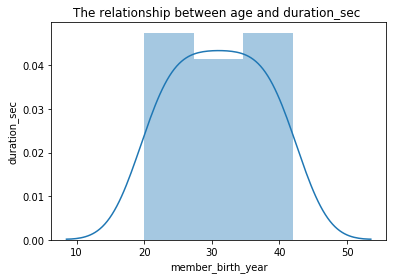

In [22]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
x=range(20, 43)

plt.xlabel("member_birth_year")
plt.ylabel("duration_sec")
plt.title("The relationship between age and duration_sec ")
sns.distplot(x)
plt.show()

Duration vs. Age

The age of users from 20 to 43. So, the age between 20 to 25 and 35 to 43 they are slower to arrive in duration unlike the age from 25 to 35 they are faster to arrive

In [23]:
df.dropna().bike_id.describe()

count    28137.000000
mean      4933.576394
std       1545.730184
min         11.000000
25%       4600.000000
50%       5318.000000
75%       6051.000000
max       6644.000000
Name: bike_id, dtype: float64

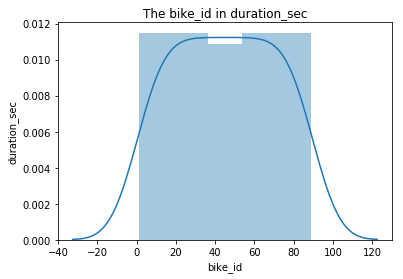

In [24]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
x=range(1,90)
plt.xlabel("bike_id")
plt.ylabel("duration_sec")
plt.title("The bike_id in duration_sec")

sns.distplot(x)
plt.show()

Duration vs. bike_id

The bike_id from -40 to 120 bike id doesn't have much affect on the duration very much. Because, bike id is equall in all but fom 40 to 60 is less time to arrive  by 0.001 to arrive unlike the rest of the bike_id. So, the bike_id from 1 to 40 and 60 to 88 they are slower to arrive in duration unlike the bike_id from 40 to 60 they are faster to arrive

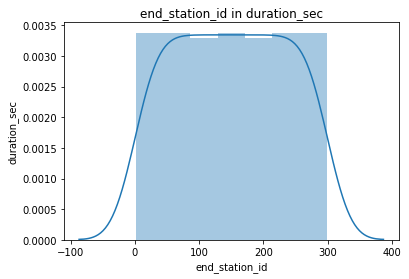

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
x=range(1 , 300)
plt.xlabel("end_station_id")
plt.ylabel("duration_sec")
plt.title("end_station_id in duration_sec")
sns.distplot(x)
plt.show()

Duration vs. end_station_id

The end_station_id is also equal from -100 to 400 end_station_id doesn't have much affect on the duration very much. Because, end_station_id  is equall in all but fom 40 to 100 and 200 to 220 is less time to arrive  by 0.011 to arrive unlike the rest of end_station_id. So, the end_station_id from 1 to 40 and 100 to 200 and 220 to 300 they are slower to arrive in duration 

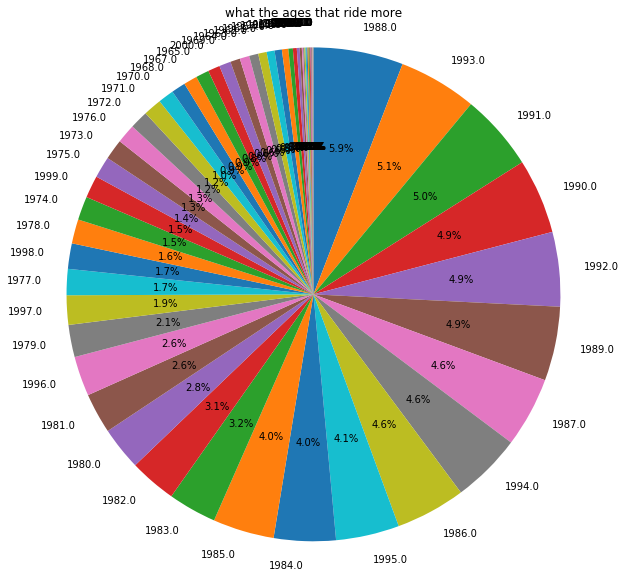

In [26]:
plt.figure(figsize = [10, 10])
sorted_counts = df['member_birth_year'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%.1f%%');
plt.axis('square');
plt.title('what the ages that ride more');

member birth year of the system users

The member birth year of the members users are from 1878 to 2001 but the categories that use the system more are born 1988

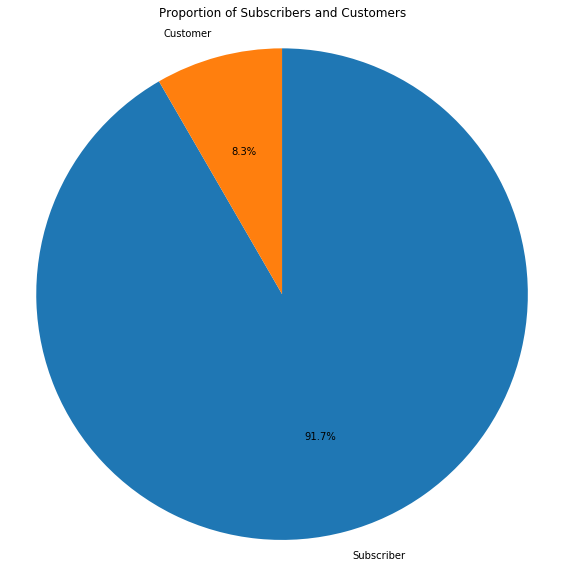

In [27]:
plt.figure(figsize = [10, 10])
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%.1f%%');
plt.axis('square');
plt.title('Proportion of Subscribers and Customers');

the types of users that use the system more 

the user that use the system more is the subscribers especially in the summer seasons more than the customer. 

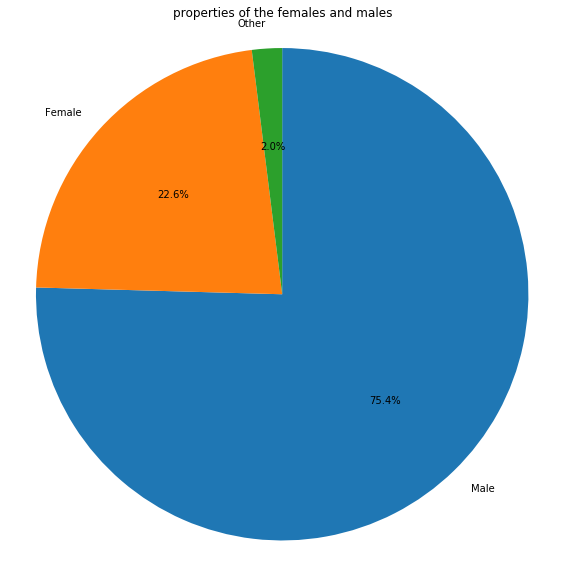

In [28]:
plt.figure(figsize = [10, 10])
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%.1f%%');
plt.axis('square');
plt.title('properties of the females and males');

the types of genders that use the system more 

the gender that more use the system is the male not female. the subscribers use the system more than the customers especially in the summer seasons 

In [29]:
df.dropna().end_time.describe()

count                        28137
unique                       28136
top       2019-02-28 17:40:37.3280
freq                             2
Name: end_time, dtype: object

In [30]:
df.dropna().start_time.describe()

count                        28137
unique                       28136
top       2019-02-25 08:52:07.5820
freq                             2
Name: start_time, dtype: object

In [31]:
import datetime

datetime.datetime.now().month

2

In [32]:
df.dropna().duration_sec.describe()

count    28137.000000
mean       668.097701
std       1583.904334
min         61.000000
25%        319.000000
50%        500.000000
75%        759.000000
max      83195.000000
Name: duration_sec, dtype: float64

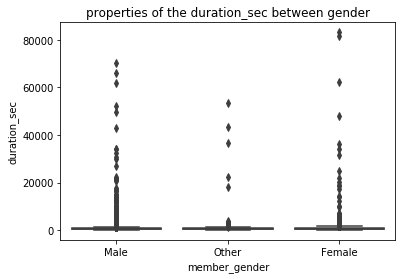

In [33]:
sns.boxplot( x=df["member_gender"], y=df["duration_sec"] )

plt.title('properties of the duration_sec between gender');

#sns.plt.show()

members gender VS duration 

the males is using the system more than the females but the females are take more time to arrive unlike the man

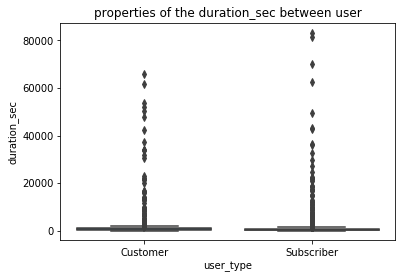

In [34]:
sns.boxplot( x=df["user_type"], y=df["duration_sec"] )

plt.title('properties of the duration_sec between user');

#sns.plt.show()

type users VS duration 

the subscribers  is using the system more than the customers  but the subscribe  are take more time to arrive unlike the customers 

In [35]:
df.dropna().duration_sec.describe()

count    28137.000000
mean       668.097701
std       1583.904334
min         61.000000
25%        319.000000
50%        500.000000
75%        759.000000
max      83195.000000
Name: duration_sec, dtype: float64

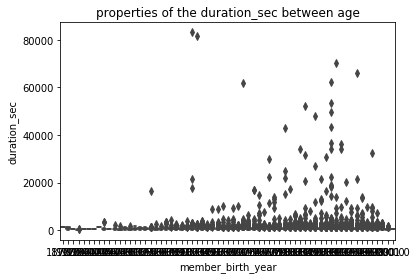

In [36]:
sns.boxplot( x=df["member_birth_year"], y=df["duration_sec"] )

plt.title('properties of the duration_sec between age');

#sns.plt.show()

members birth year  VS duration 

age of users from 20 to 43. So, the age between 20 to 25 and 35 to 43 they are slower to arrive in duration unlike the age from 25 to 35 they are faster to arrive 

In [37]:
df.dropna().start_station_id.describe()

count    28137.000000
mean       135.069055
std        111.416510
min          3.000000
25%         44.000000
50%         96.000000
75%        233.000000
max        398.000000
Name: start_station_id, dtype: float64

#  Bivariate Exploration

In [38]:
df.dropna().duration_sec.describe()

count    28137.000000
mean       668.097701
std       1583.904334
min         61.000000
25%        319.000000
50%        500.000000
75%        759.000000
max      83195.000000
Name: duration_sec, dtype: float64

In [39]:
df.dropna().member_birth_year.describe()

count    28137.00000
mean      1984.76984
std          9.99456
min       1878.00000
25%       1980.00000
50%       1987.00000
75%       1992.00000
max       2001.00000
Name: member_birth_year, dtype: float64

In [41]:
df.dropna().duration_sec.describe()

count    28137.000000
mean       668.097701
std       1583.904334
min         61.000000
25%        319.000000
50%        500.000000
75%        759.000000
max      83195.000000
Name: duration_sec, dtype: float64

In [42]:

df.dropna().start_station_longitude.describe()

count    28137.000000
mean      -122.352031
std          0.119796
min       -122.453704
25%       -122.411726
50%       -122.397405
75%       -122.291360
max       -121.874119
Name: start_station_longitude, dtype: float64

Text(0.5,1,'is There relationship between age and type')

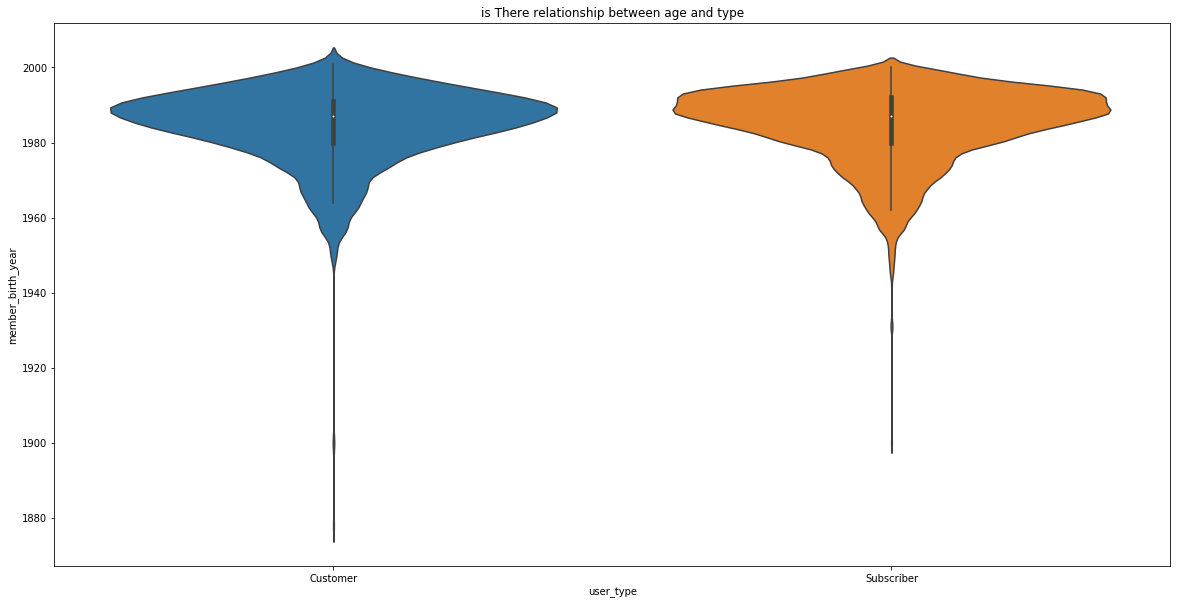

In [45]:

# plot
plt.figure(figsize=(20,10))

sns.violinplot( x=df["user_type"], y=df["member_birth_year"] )

plt.title("is There relationship between age and type")


#sns.plt.show()


members birth year  VS users_type

type of users is customers and subscribers . So, the the subscribers using the system more than the customers but the customer age is older than the subscribers. 

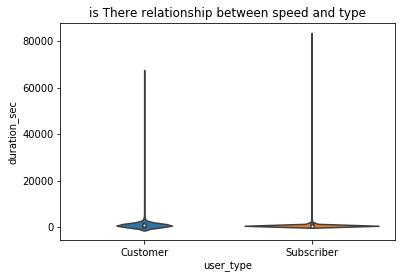

In [46]:
# plot

sns.violinplot( x=df["user_type"], y=df["duration_sec"] )

plt.title("is There relationship between speed and type")


#sns.plt.show()


plt.show()

type users VS duration 

the subscribers  is using the system more than the customers  but the subscribe  are take more time to arrive unlike the customers 

Text(0.5,1,'is There relationship between speed and gender')

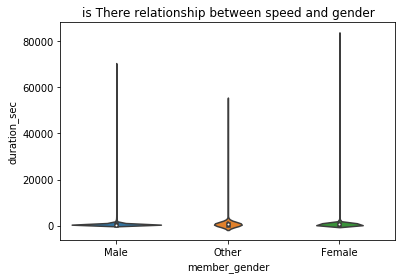

In [47]:
# plot

sns.violinplot( x=df["member_gender"], y=df["duration_sec"] )

plt.title("is There relationship between speed and gender")

#sns.plt.show()


members gender VS duration 

the males is using the system more than the females but the females are take more time to arrive unlike the man

Text(0.5,1,'is There relationship between speed in duration and gender')

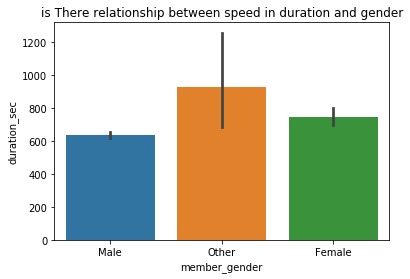

In [49]:
sb.barplot( x=df["member_gender"], y=df["duration_sec"] )

plt.title("is There relationship between speed in duration and gender")



#sns.plt.show()


members gender VS duration 

the males is using the system more than the females but the females are take more time to arrive unlike the man

Text(0.5,1,'is There relationship between speed in duration and user')

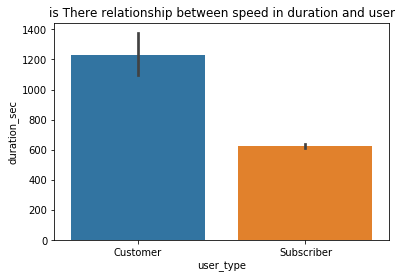

In [50]:
sb.barplot( x=df["user_type"], y=df["duration_sec"] )

plt.title("is There relationship between speed in duration and user")


#sns.plt.show()


type users VS duration 

the subscribers  is using the system more than the customers  but the subscribe  are take more time to arrive unlike the customers 

# Multivariate Exploration

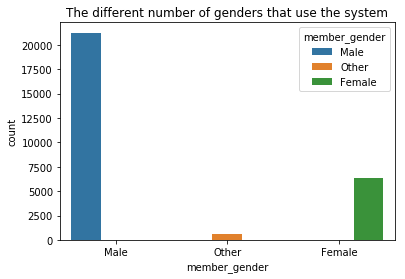

In [51]:
ax = sns.countplot(data = df, x="member_gender", hue="member_gender")
plt.title('The different number of genders that use the system');

members gender that using the system 

the males is using the system more than the females but the females are take more time to arrive unlike the man

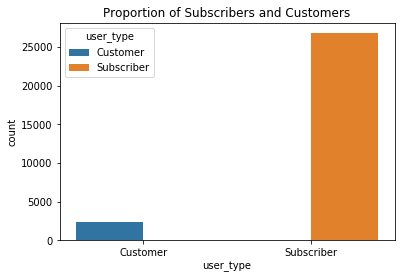

In [52]:
ax = sns.countplot(data = df, x="user_type", hue="user_type")
plt.title('Proportion of Subscribers and Customers');

type users that use the system  

the subscribers  is using the system more than the customers  but the subscribe  are take more time to arrive unlike the customers 

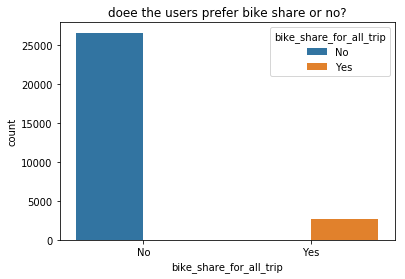

In [53]:
ax = sns.countplot(data = df, x="bike_share_for_all_trip", hue="bike_share_for_all_trip")
plt.title('doee the users prefer bike share or no?');

is users agree to the bike share 

users doesn't prefer to bikes share, so the bike share system is useless to the system. 

in Summary a lot more subscribers using the bike sharing system than casual customers overall,subscribers ride during the summer season the most and the least during the winter months. subscribers used the system heavily on work days concentrated around 7-9am and 17-18pm for work commute, whereas customers ride a lot over weekends and in the afternoon for leisure/touring purposes. Subscribers tended to have much shorter/quicker trips compared to customers which makes subscriber usage more efficient. both Customer and Subscriber are showing similar trends for age and trip duration, but for subscribers the trip duration is higher for older age.